In [1]:
import sys
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
sys.path.append(r'reflutils')
from reflutils import FileDialog, Refl, tree

In [5]:
xrrDataBase = FileDialog.getDirectory(title="Select the XRR Database")

# tree(xrrDataBase)

In [71]:
energyList = xrrDataBase.iterdir()
energyList = [x for x in energyList if x.is_dir()]
POL = ["100.0", "190.0"]

In [74]:
def multiPlot():
    combinedDataFrame = pd.DataFrame()
    wantedCols = ["Q", "Refl", "Err"]
    for e in energyList:
        try:
            xrr = Refl(e / POL[1])
            xrr.plot()
        except Exception as err:
            print(f"{e} - Could not plot {e.name} {POL[1]}")
            continue
        while True:
            if input("Press enter to continue") == "":
                break
            elif input("Press q to quit") == "q":
                return 0
        plt.plot()

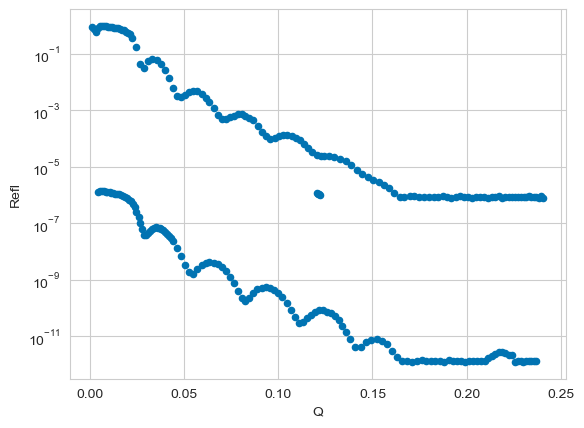

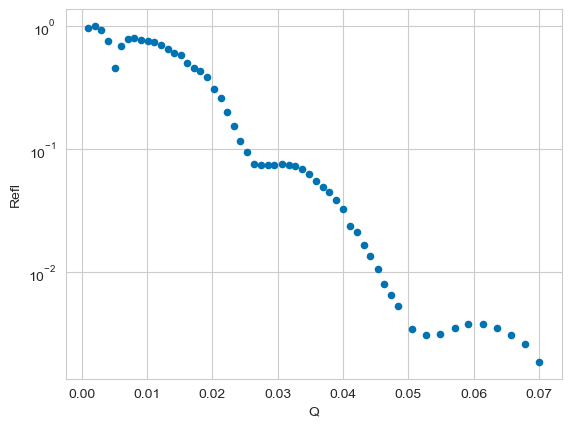

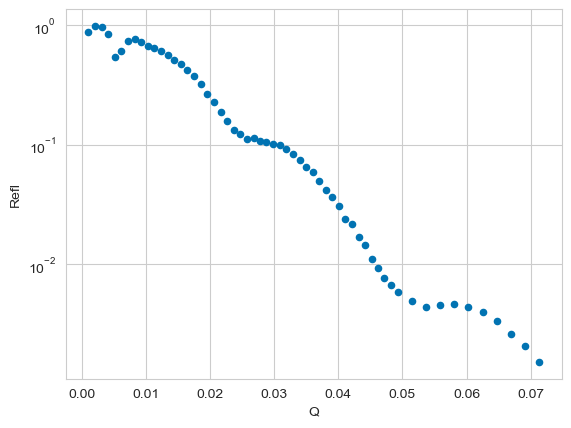

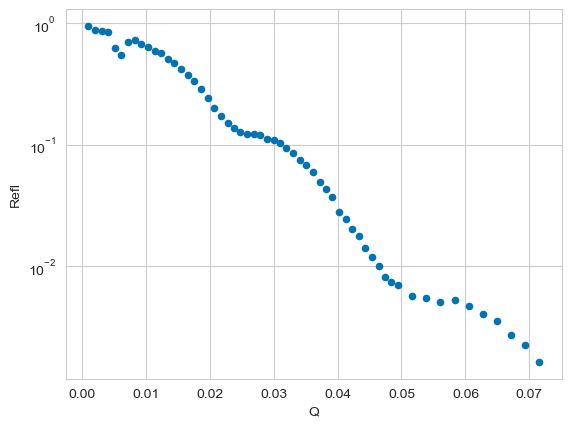

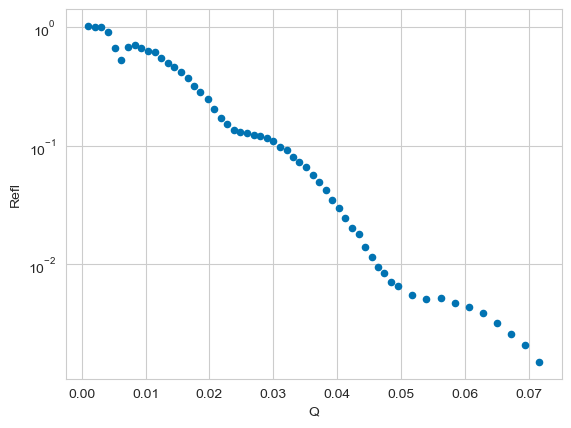

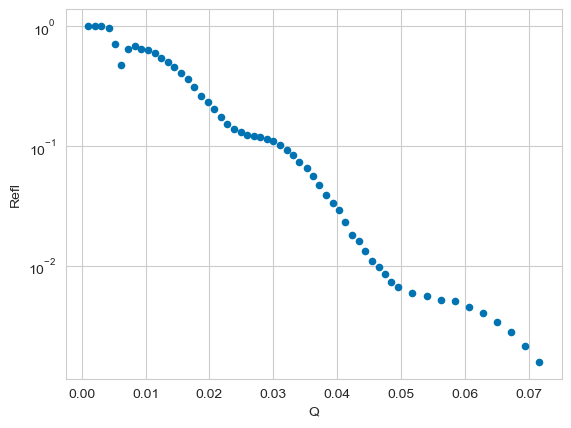

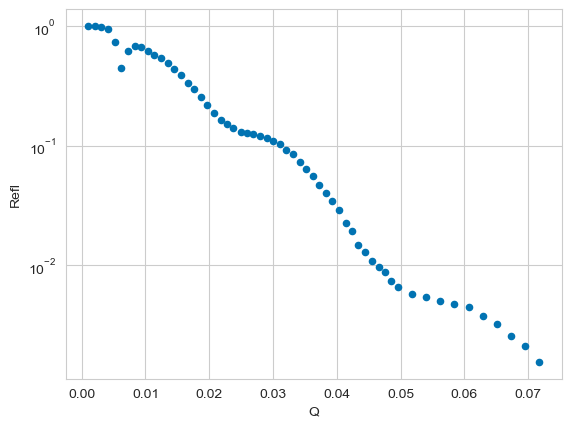

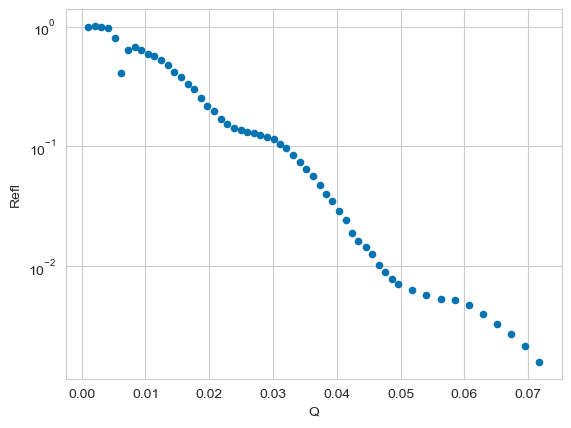

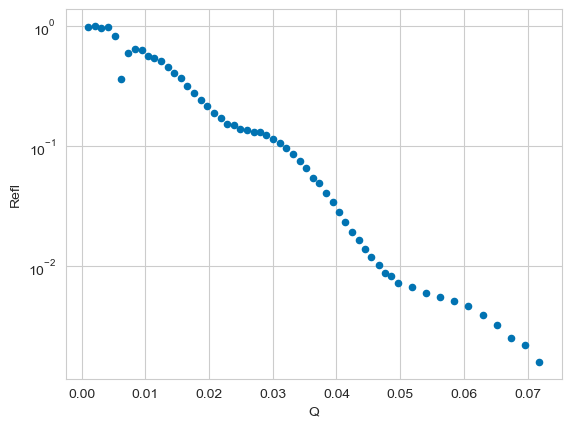

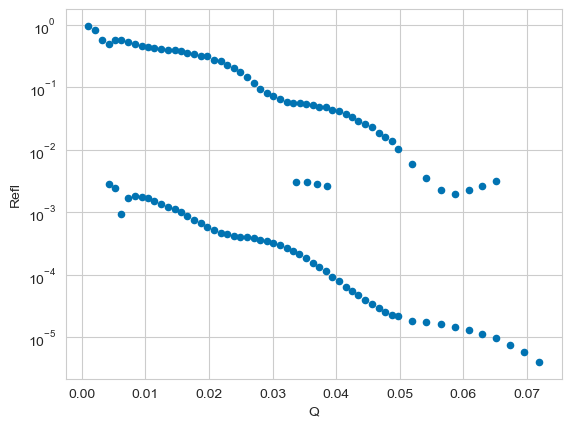

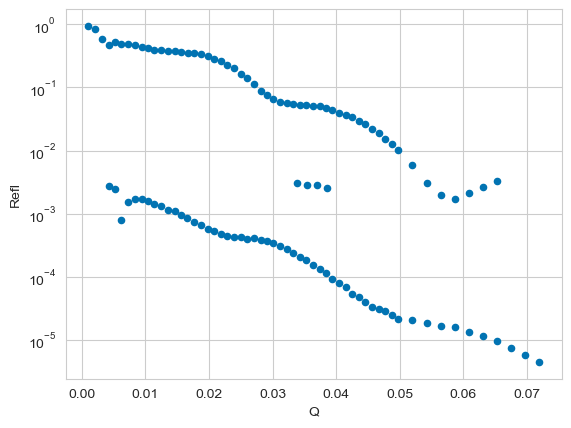

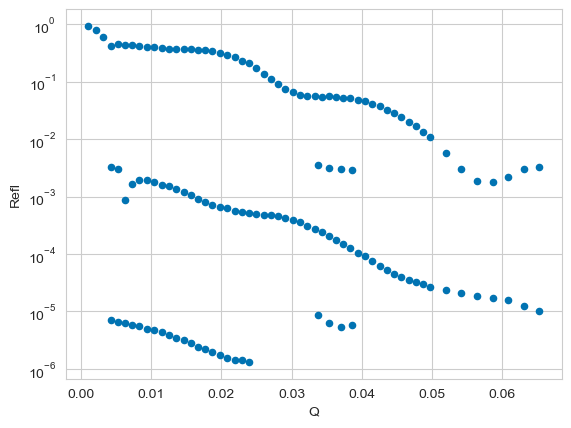

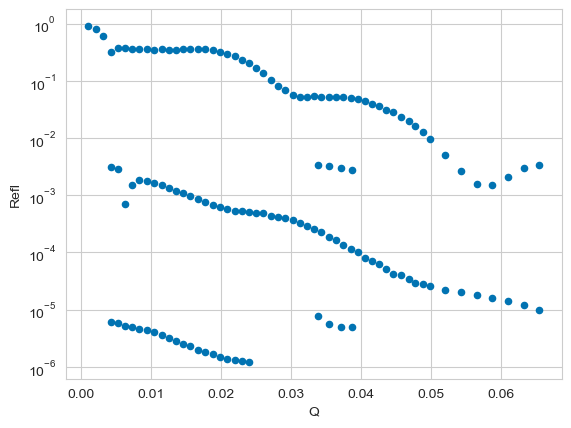

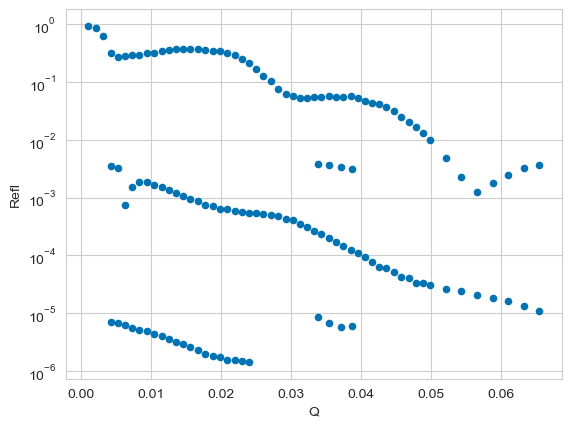

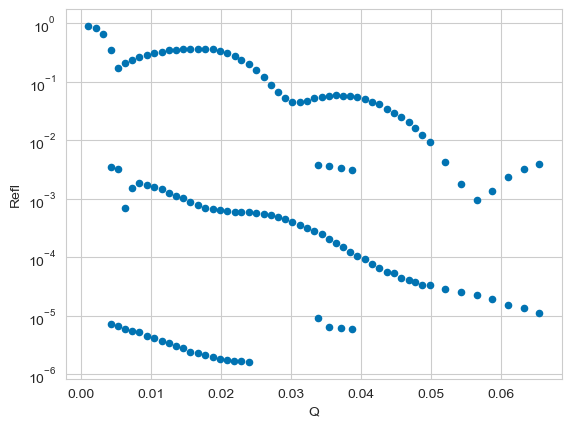

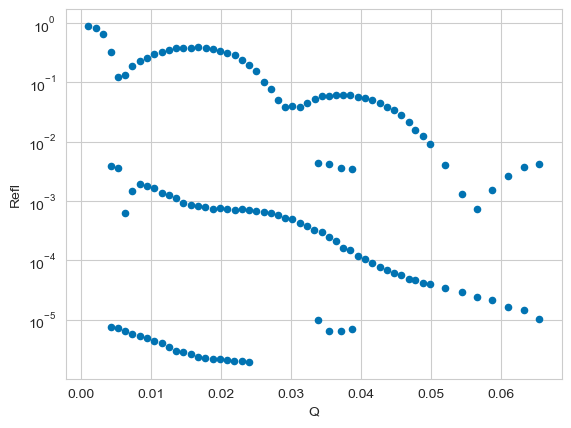

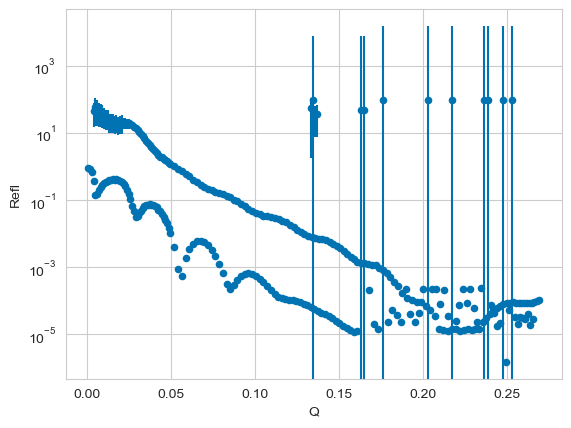

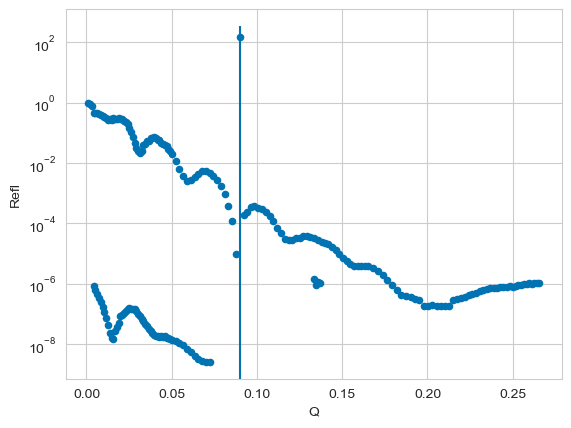

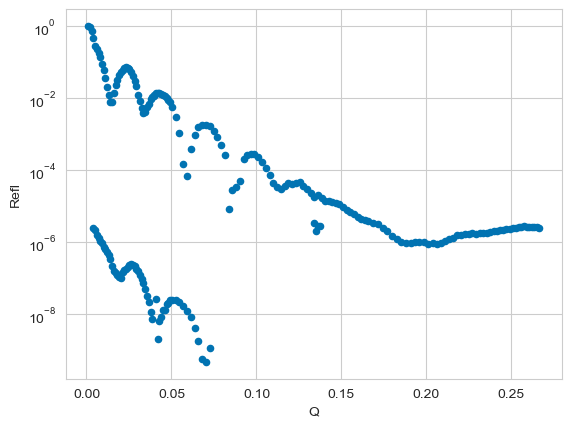

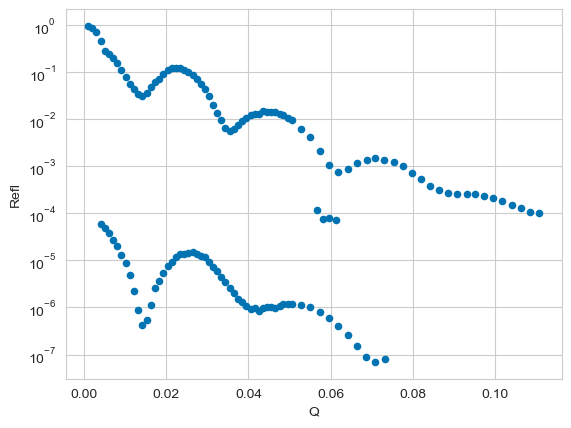

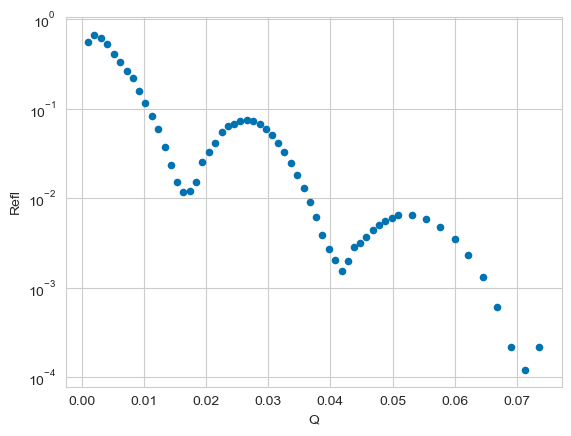

In [75]:
multiPlot()

In [59]:
import pandas as pd
import seaborn as sns

In [77]:
def multiEnPlot(pol :str = POL[0]):
    SCALE = -.5
    combinedDataFrame = pd.DataFrame()
    wantedCols = ["Q", "Refl", "Err"]
    fig, ax = plt.subplots(figsize=(6, 12))
    sns.color_palette("colorblind", n_colors=len(energyList))
    for i, e in enumerate(energyList):
        try:
            xrr = Refl(e / pol)
            combinedCols = [f"{colName}_{e.name}_{pol}" for colName in wantedCols]
            combinedDataFrame[combinedCols] = xrr.refl[wantedCols]

            x = xrr.refl["Q"]
            y = xrr.refl["Refl"]
            yerr = xrr.refl["Err"]

            ax.errorbar(x, y * 10 ** (SCALE * i), yerr=yerr * 10 ** (SCALE*i), label=f"{e.name} {pol}", fmt="o")
            ax.legend()
            ax.set_xlabel("Q")
            ax.set_ylabel("Reflectivity")
            ax.set_title("Reflectivity Curves \nCompared Across Energies", fontsize=16)
            ax.set_yscale("log")
            if i == 0:
                ax.set_xlim(0, max(x))
            else:
                if ax.get_xlim()[1] > max(x):
                    ax.set_xlim(0, max(x))
            ax.set_ylim(auto = True)
        except Exception as err:
            print(f"{err} - No data for  {e.name} {pol}")
            continue
    plt.show()
    return combinedDataFrame

Unable to coerce to DataFrame, shape must be (1, 15): given (4, 15) - No data for  281.6 100.0
operands could not be broadcast together with shapes (2,) (0,)  - No data for  284.2 100.0


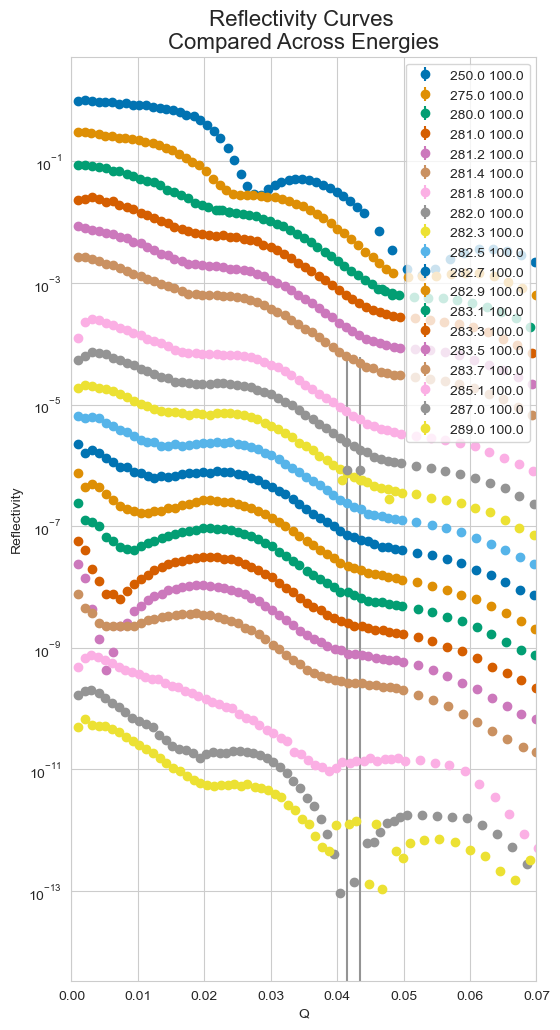

In [78]:
combinedRefl = multiEnPlot()

,Q_250.0_100.0,Refl_250.0_100.0,Err_250.0_100.0,Q_275.0_100.0,Refl_275.0_100.0,Err_275.0_100.0,Q_280.0_100.0,Refl_280.0_100.0,Err_280.0_100.0,Q_281.0_100.0,...,Err_283.7_100.0,Q_285.1_100.0,Refl_285.1_100.0,Err_285.1_100.0,Q_287.0_100.0,Refl_287.0_100.0,Err_287.0_100.0,Q_289.0_100.0,Refl_289.0_100.0,Err_289.0_100.0
0,0.00100,0.984478,3.241795e-02,0.00100,0.968938,7.581237e-03,0.00100,0.885655,8.485671e-03,0.00100,...,1.122403e-03,0.00100,0.492086,3.567791e-03,0.00100,0.520990,3.399753e-03,0.00100,0.491456,7.530292e-03
1,0.00200,1.039738,3.421255e-02,0.00200,0.946977,7.406586e-03,0.00210,0.876189,8.385147e-03,0.00210,...,6.682098e-04,0.00200,0.691353,5.014731e-03,0.00200,0.621676,4.056494e-03,0.00200,0.682170,1.044437e-02
2,0.00310,0.991271,3.263041e-02,0.00300,0.924801,7.235450e-03,0.00310,0.849381,8.131712e-03,0.00310,...,5.508936e-04,0.00300,0.759390,5.509581e-03,0.00300,0.634518,4.141995e-03,0.00310,0.544426,8.338621e-03
3,0.00410,0.957907,3.153975e-02,0.00410,0.898491,7.026695e-03,0.00410,0.801369,7.675047e-03,0.00410,...,3.801519e-04,0.00400,0.715665,5.190503e-03,0.00410,0.566373,3.698167e-03,0.00410,0.522117,7.999783e-03
4,0.00510,0.957632,3.154219e-02,0.00510,0.820494,6.415777e-03,0.00520,0.777453,7.448962e-03,0.00520,...,3.349439e-04,0.00500,0.629643,4.568469e-03,0.00510,0.468671,3.059657e-03,0.00510,0.522682,8.007391e-03
5,0.00610,0.953449,3.137692e-02,0.00610,0.840193,6.572757e-03,0.00620,0.702804,6.728647e-03,0.00620,...,3.334929e-04,0.00610,0.560436,4.062908e-03,0.00610,0.388991,2.540405e-03,0.00610,0.471202,7.221358e-03
6,0.00710,0.889796,2.929305e-02,0.00710,0.781936,6.111988e-03,0.00720,0.688186,6.591061e-03,0.00720,...,3.317481e-04,0.00710,0.479623,3.478328e-03,0.00710,0.330887,2.160295e-03,0.00720,0.406872,6.231680e-03
7,0.00820,0.896405,2.952234e-02,0.00810,0.781015,6.098689e-03,0.00830,0.625620,5.993557e-03,0.00830,...,3.350304e-04,0.00810,0.428147,3.103568e-03,0.00810,0.279170,1.823289e-03,0.00820,0.336668,5.158458e-03
8,0.00920,0.859773,2.828026e-02,0.00910,0.747815,5.841747e-03,0.00930,0.575543,5.516059e-03,0.00930,...,3.429641e-04,0.00910,0.404110,2.925999e-03,0.00910,0.223511,1.458708e-03,0.00920,0.295689,4.528382e-03
9,0.01020,0.844551,2.778998e-02,0.01010,0.702790,5.492133e-03,0.01030,0.522287,5.005856e-03,0.01040,...,3.815618e-04,0.01010,0.369981,2.679856e-03,0.01020,0.200641,1.308539e-03,0.01020,0.254757,3.902901e-03


In [8]:
# combinedRefl.to_csv(xrrDataBase / f"EnergyComparison_{POL[0]}.csv", index=False)
combinedRefl = pd.read_csv(xrrDataBase / f"EnergyComparison_{POL[0]}.csv")

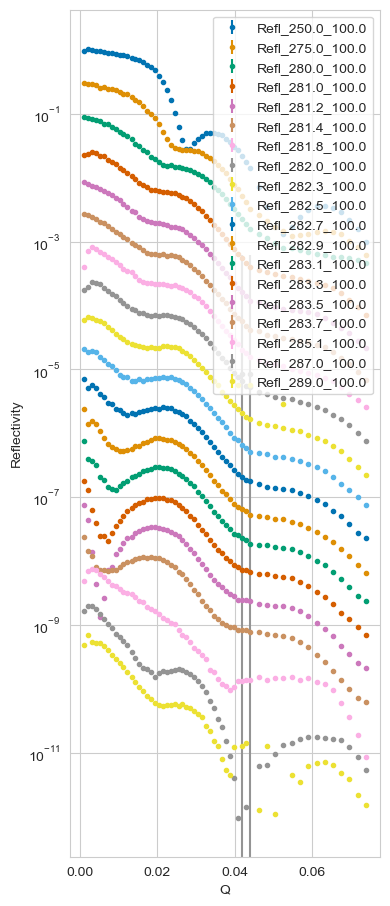

In [70]:
from re import S
from turtle import st

from matplotlib import axes


def justPlotting(df):
    # Plotting the data
    # fig, ax = plt.subplots(figsize=(6, 12))
    SCALE = -.5
    df = df.dropna()
    Q = df.columns[0]
    R = df.columns[1::3]
    Err = df.columns[2::3]
    fig, axes = plt.subplots(figsize=(4, 11))
    for i in range(len(R)):
        df.loc[:,R[i]] = df.loc[:,R[i]] * 10 ** (i*SCALE)
        df.loc[:,Err[i]] = df.loc[:,Err[i]] * 10 ** (i*SCALE)
        axes.errorbar(df.loc[:,Q], df.loc[:,R[i]], yerr=df.loc[:,Err[i]], fmt='.', label=R[i])
    axes.set_xlabel("Q")
    axes.set_ylabel('Reflectivity')
    axes.set_yscale('log')
    plt.legend()

justPlotting(combinedRefl)